# Module 3: Statistics and Probability Analysis

**Author:** Chinmay Nadgir  
**Date:** October 2025  
**Purpose:** Demonstrate statistical analysis techniques for data-driven decision making

---

## Table of Contents
1. [Introduction](#intro)
2. [Setup & Data Loading](#setup)
3. [Descriptive Statistics](#descriptive)
4. [Probability Distributions](#distributions)
5. [Correlation Analysis](#correlation)
6. [Hypothesis Testing](#hypothesis)
7. [ANOVA](#anova)
8. [Confidence Intervals](#confidence)
9. [A/B Testing](#abtest)
10. [Linear Regression](#regression)
11. [Summary](#summary)

<a id='intro'></a>
## 1. Introduction

Statistical analysis provides the foundation for data-driven insights and decision making. This module covers essential statistical techniques used in data science.

**Learning Objectives:**
- Calculate and interpret descriptive statistics
- Understand probability distributions
- Analyze correlations between variables
- Conduct hypothesis tests
- Perform ANOVA and regression analysis
- Design and analyze A/B tests

<a id='setup'></a>
## 2. Setup & Data Loading

In [5]:
# Standard library imports
import warnings
from pathlib import Path
from typing import Tuple

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, binom, poisson, t
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

np.random.seed(42)
print(f"statsmodels: {sm.__version__}")

statsmodels: 0.14.5


In [6]:
# Load cleaned data from Module 2
data_dir = Path('data')

try:
    df = pd.read_csv(data_dir / 'cleaned_data.csv', parse_dates=['date'])
    print(f"Loaded cleaned data: {df.shape}")
except FileNotFoundError:
    print("Cleaned data not found. Creating sample dataset...")
    data_dir.mkdir(exist_ok=True)
    np.random.seed(42)
    df = pd.DataFrame({
        'customer_id': range(1, 101),
        'age': np.random.randint(18, 70, 100),
        'purchase_amount': np.random.uniform(10, 1000, 100).round(2),
        'category': np.random.choice(['Electronics', 'Clothing', 'Food', 'Books'], 100),
        'loyalty_member': np.random.choice([True, False], 100)
    })

display(df.head())

Loaded cleaned data: (100, 17)


,customer_id,name,age,purchase_amount,category,date,loyalty_member,year,month,day_of_week,day_name,quarter,age_group,purchase_category,age_scaled,purchase_amount_scaled,purchase_category_encoded
0,1,Customer_1,56.0,173.61,Books,2024-01-01,False,2024,1,0,Monday,1,51+,Medium,0.8555,-1.1457,2
1,2,Customer_2,69.0,25.48,Electronics,2024-01-02,False,2024,1,1,Tuesday,1,51+,Low,1.7437,-1.7038,1
2,3,Customer_3,46.0,429.17,Food,2024-01-03,False,2024,1,2,Wednesday,1,36-50,High,0.1722,-0.1828,3
3,4,Customer_4,32.0,400.93,Books,2024-01-04,True,2024,1,3,Thursday,1,26-35,High,-0.7844,-0.2892,3
4,5,Customer_5,60.0,300.55,Books,2024-01-05,True,2024,1,4,Friday,1,51+,High,1.1288,-0.6674,3


<a id='descriptive'></a>
## 3. Descriptive Statistics

Descriptive statistics summarize and describe the main features of a dataset.

In [7]:
# Calculate comprehensive descriptive statistics
def comprehensive_stats(series: pd.Series) -> pd.DataFrame:
    """
    Calculate comprehensive descriptive statistics for a numeric series.
    """
    stats_dict = {
        'Count': series.count(),
        'Mean': series.mean(),
        'Median': series.median(),
        'Mode': series.mode()[0] if len(series.mode()) > 0 else np.nan,
        'Std Dev': series.std(),
        'Variance': series.var(),
        'Min': series.min(),
        'Q1': series.quantile(0.25),
        'Q2 (Median)': series.quantile(0.50),
        'Q3': series.quantile(0.75),
        'Max': series.max(),
        'IQR': series.quantile(0.75) - series.quantile(0.25),
        'Range': series.max() - series.min(),
        'Skewness': series.skew(),
        'Kurtosis': series.kurtosis()
    }
    return pd.DataFrame(stats_dict, index=['Value']).T

# Calculate for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'customer_id']

for col in numeric_cols:
    print(f"\nDescriptive Statistics for {col}:")
    print("=" * 60)
    display(comprehensive_stats(df[col]))


Descriptive Statistics for age:


,Value
Count,100.0000
Mean,43.4800
Median,42.0000
Mode,42.0000
Std Dev,14.7089
Variance,216.3531
Min,19.0000
Q1,32.0000
Q2 (Median),42.0000
Q3,57.0000



Descriptive Statistics for purchase_amount:


,Value
Count,100.0000
Mean,477.6808
Median,454.9600
Mode,454.9600
Std Dev,266.7451
Variance,71152.9242
Min,10.5200
Q1,259.6375
Q2 (Median),454.9600
Q3,686.8025



Descriptive Statistics for year:


,Value
Count,100.0
Mean,2024.0
Median,2024.0
Mode,2024.0
Std Dev,0.0
Variance,0.0
Min,2024.0
Q1,2024.0
Q2 (Median),2024.0
Q3,2024.0



Descriptive Statistics for month:


,Value
Count,100.0000
Mean,2.1800
Median,2.0000
Mode,1.0000
Std Dev,0.9784
Variance,0.9572
Min,1.0000
Q1,1.0000
Q2 (Median),2.0000
Q3,3.0000



Descriptive Statistics for day_of_week:


,Value
Count,100.0000
Mean,2.9500
Median,3.0000
Mode,0.0000
Std Dev,2.0220
Variance,4.0884
Min,0.0000
Q1,1.0000
Q2 (Median),3.0000
Q3,5.0000



Descriptive Statistics for quarter:


,Value
Count,100.0000
Mean,1.0900
Median,1.0000
Mode,1.0000
Std Dev,0.2876
Variance,0.0827
Min,1.0000
Q1,1.0000
Q2 (Median),1.0000
Q3,1.0000



Descriptive Statistics for age_scaled:


,Value
Count,1.0000e+02
Mean,2.4758e-16
Median,-1.0113e-01
Mode,-1.0113e-01
Std Dev,1.0050e+00
Variance,1.0101e+00
Min,-1.6727e+00
Q1,-7.8441e-01
Q2 (Median),-1.0113e-01
Q3,9.2380e-01



Descriptive Statistics for purchase_amount_scaled:


,Value
Count,1.0000e+02
Mean,3.0337e-16
Median,-8.5607e-02
Mode,-8.5607e-02
Std Dev,1.0050e+00
Variance,1.0101e+00
Min,-1.7602e+00
Q1,-8.2154e-01
Q2 (Median),-8.5607e-02
Q3,7.8793e-01



Descriptive Statistics for purchase_category_encoded:


,Value
Count,100.0000
Mean,3.0600
Median,3.0000
Mode,4.0000
Std Dev,0.9829
Variance,0.9661
Min,1.0000
Q1,2.0000
Q2 (Median),3.0000
Q3,4.0000


In [8]:
# Interpretation of skewness and kurtosis
print("\nInterpretation Guide:")
print("=" * 60)
print("Skewness:")
print("  -0.5 to 0.5: Approximately symmetric")
print("  0.5 to 1.0 or -0.5 to -1.0: Moderately skewed")
print("  >1.0 or <-1.0: Highly skewed")
print("\nKurtosis:")
print("  ~0: Normal distribution")
print("  >0: Heavy tails (leptokurtic)")
print("  <0: Light tails (platykurtic)")


Interpretation Guide:
Skewness:
  -0.5 to 0.5: Approximately symmetric
  0.5 to 1.0 or -0.5 to -1.0: Moderately skewed
  >1.0 or <-1.0: Highly skewed

Kurtosis:
  ~0: Normal distribution
  >0: Heavy tails (leptokurtic)
  <0: Light tails (platykurtic)


<a id='distributions'></a>
## 4. Probability Distributions

Understanding data distributions is crucial for selecting appropriate statistical tests.

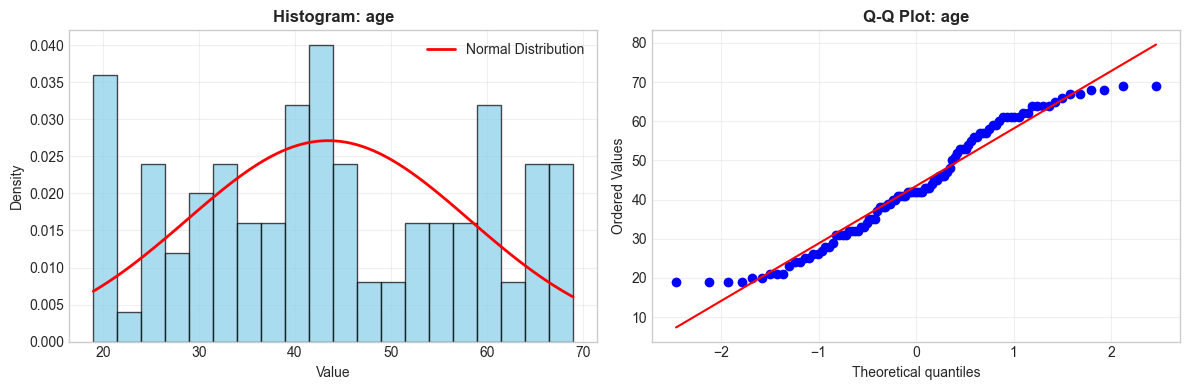


Shapiro-Wilk Test for age:
  Statistic: 0.9550
  P-value: 0.0018
  Result: Data does not appear normally distributed (p <= 0.05)


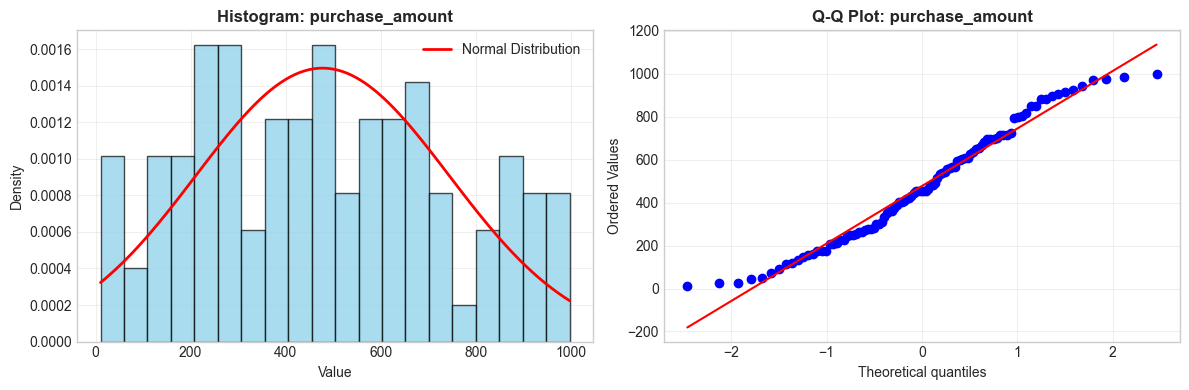


Shapiro-Wilk Test for purchase_amount:
  Statistic: 0.9687
  P-value: 0.0175
  Result: Data does not appear normally distributed (p <= 0.05)


In [9]:
# Test for normality using Q-Q plot and Shapiro-Wilk test
def test_normality(data: pd.Series, column_name: str):
    """
    Test if data follows normal distribution using Q-Q plot and Shapiro-Wilk test.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram with normal curve overlay
    axes[0].hist(data, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    mu, sigma = data.mean(), data.std()
    x = np.linspace(data.min(), data.max(), 100)
    axes[0].plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal Distribution')
    axes[0].set_title(f'Histogram: {column_name}', fontweight='bold')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Density')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Q-Q plot
    stats.probplot(data, dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q Plot: {column_name}', fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Shapiro-Wilk test
    statistic, p_value = stats.shapiro(data)
    print(f"\nShapiro-Wilk Test for {column_name}:")
    print(f"  Statistic: {statistic:.4f}")
    print(f"  P-value: {p_value:.4f}")
    if p_value > 0.05:
        print(f"  Result: Data appears normally distributed (p > 0.05)")
    else:
        print(f"  Result: Data does not appear normally distributed (p <= 0.05)")

for col in numeric_cols[:2]:  # Test first two numeric columns
    test_normality(df[col].dropna(), col)

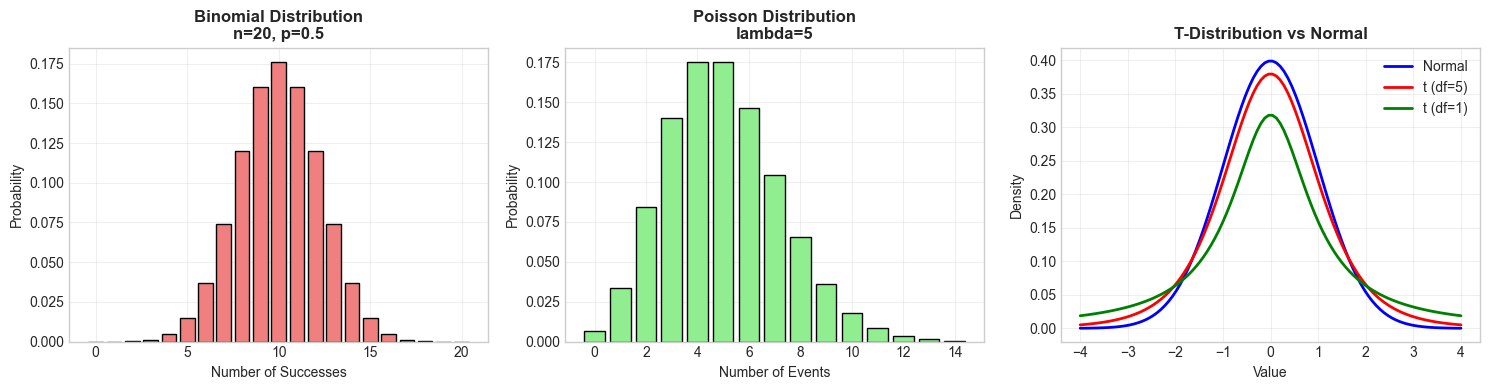

In [10]:
# Demonstrate other distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Binomial distribution
n, p = 20, 0.5
x_binom = np.arange(0, n+1)
y_binom = binom.pmf(x_binom, n, p)
axes[0].bar(x_binom, y_binom, color='lightcoral', edgecolor='black')
axes[0].set_title('Binomial Distribution\nn=20, p=0.5', fontweight='bold')
axes[0].set_xlabel('Number of Successes')
axes[0].set_ylabel('Probability')
axes[0].grid(alpha=0.3)

# Poisson distribution
mu = 5
x_poisson = np.arange(0, 15)
y_poisson = poisson.pmf(x_poisson, mu)
axes[1].bar(x_poisson, y_poisson, color='lightgreen', edgecolor='black')
axes[1].set_title(f'Poisson Distribution\nlambda={mu}', fontweight='bold')
axes[1].set_xlabel('Number of Events')
axes[1].set_ylabel('Probability')
axes[1].grid(alpha=0.3)

# T-distribution comparison with normal
x = np.linspace(-4, 4, 100)
axes[2].plot(x, norm.pdf(x, 0, 1), 'b-', linewidth=2, label='Normal')
axes[2].plot(x, t.pdf(x, df=5), 'r-', linewidth=2, label='t (df=5)')
axes[2].plot(x, t.pdf(x, df=1), 'g-', linewidth=2, label='t (df=1)')
axes[2].set_title('T-Distribution vs Normal', fontweight='bold')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Density')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

<a id='correlation'></a>
## 5. Correlation Analysis

Correlation measures the strength and direction of relationships between variables.

Pearson Correlation Matrix:


,age,purchase_amount,year,month,day_of_week,quarter,age_scaled,purchase_amount_scaled,purchase_category_encoded
age,1.0000,-0.0773,NaN,0.0157,-0.0335,0.0756,1.0000,-0.0773,-0.0893
purchase_amount,-0.0773,1.0000,NaN,-0.0077,-0.0051,0.1199,-0.0773,1.0000,0.9099
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.0157,-0.0077,NaN,1.0000,0.0148,0.5880,0.0157,-0.0077,-0.0008
day_of_week,-0.0335,-0.0051,NaN,0.0148,1.0000,-0.0790,-0.0335,-0.0051,-0.0086
quarter,0.0756,0.1199,NaN,0.5880,-0.0790,1.0000,0.0756,0.1199,0.0879
age_scaled,1.0000,-0.0773,NaN,0.0157,-0.0335,0.0756,1.0000,-0.0773,-0.0893
purchase_amount_scaled,-0.0773,1.0000,NaN,-0.0077,-0.0051,0.1199,-0.0773,1.0000,0.9099
purchase_category_encoded,-0.0893,0.9099,NaN,-0.0008,-0.0086,0.0879,-0.0893,0.9099,1.0000


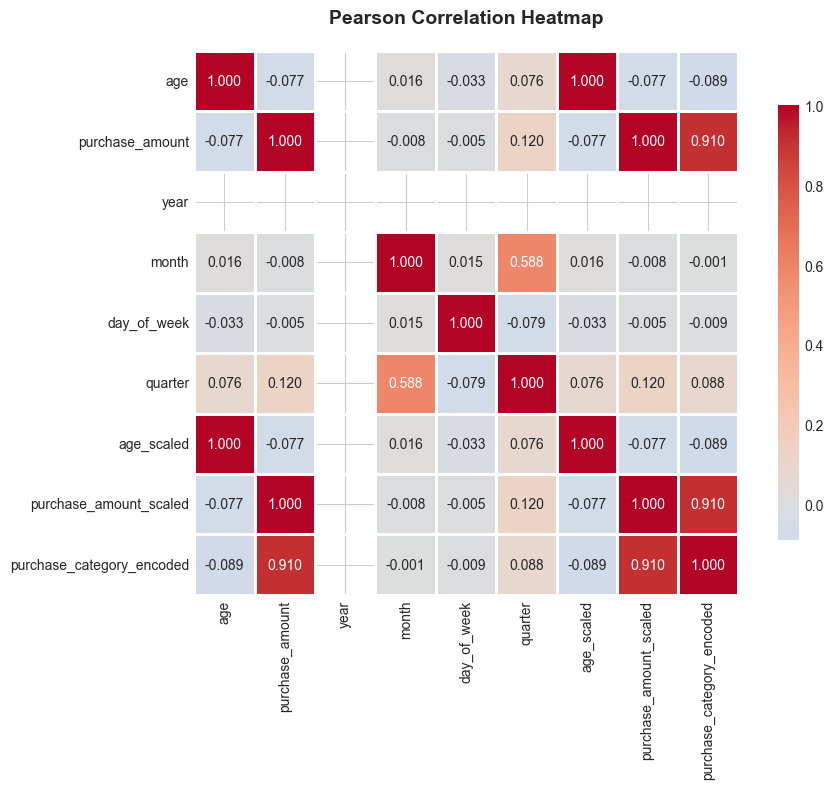

In [11]:
# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr(method='pearson')

print("Pearson Correlation Matrix:")
display(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Pearson Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [12]:
# Compare correlation methods
if len(numeric_cols) >= 2:
    col1, col2 = numeric_cols[0], numeric_cols[1]
    
    pearson_r, pearson_p = stats.pearsonr(df[col1], df[col2])
    spearman_r, spearman_p = stats.spearmanr(df[col1], df[col2])
    kendall_tau, kendall_p = stats.kendalltau(df[col1], df[col2])
    
    print(f"\nCorrelation between {col1} and {col2}:")
    print("=" * 60)
    print(f"Pearson r: {pearson_r:.4f} (p-value: {pearson_p:.4f})")
    print(f"Spearman rho: {spearman_r:.4f} (p-value: {spearman_p:.4f})")
    print(f"Kendall tau: {kendall_tau:.4f} (p-value: {kendall_p:.4f})")
    
    print("\nInterpretation:")
    print("  0.0 to 0.3: Weak correlation")
    print("  0.3 to 0.7: Moderate correlation")
    print("  0.7 to 1.0: Strong correlation")
    print("  p < 0.05: Statistically significant")


Correlation between age and purchase_amount:
Pearson r: -0.0773 (p-value: 0.4449)
Spearman rho: -0.0938 (p-value: 0.3531)
Kendall tau: -0.0578 (p-value: 0.3990)

Interpretation:
  0.0 to 0.3: Weak correlation
  0.3 to 0.7: Moderate correlation
  0.7 to 1.0: Strong correlation
  p < 0.05: Statistically significant


<a id='hypothesis'></a>
## 6. Hypothesis Testing

Hypothesis tests help determine if observed differences are statistically significant.

In [13]:
# One-sample t-test
# H0: Population mean = hypothesized value
# H1: Population mean != hypothesized value

if 'age' in df.columns:
    hypothesized_mean = 40
    t_stat, p_value = stats.ttest_1samp(df['age'], hypothesized_mean)
    
    print("One-Sample T-Test:")
    print("=" * 60)
    print(f"H0: Population mean age = {hypothesized_mean}")
    print(f"H1: Population mean age != {hypothesized_mean}")
    print(f"\nSample mean: {df['age'].mean():.2f}")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"\nDecision (alpha=0.05):")
    if p_value < 0.05:
        print(f"  Reject H0. Mean age is significantly different from {hypothesized_mean}.")
    else:
        print(f"  Fail to reject H0. No significant difference from {hypothesized_mean}.")

One-Sample T-Test:
H0: Population mean age = 40
H1: Population mean age != 40

Sample mean: 43.48
T-statistic: 2.3659
P-value: 0.0199

Decision (alpha=0.05):
  Reject H0. Mean age is significantly different from 40.


In [14]:
# Two-sample t-test (independent samples)
# Compare purchase amounts between loyalty members and non-members

if 'loyalty_member' in df.columns and 'purchase_amount' in df.columns:
    group1 = df[df['loyalty_member'] == True]['purchase_amount']
    group2 = df[df['loyalty_member'] == False]['purchase_amount']
    
    t_stat, p_value = stats.ttest_ind(group1, group2)
    
    print("\n\nTwo-Sample T-Test (Independent):")
    print("=" * 60)
    print("H0: Mean purchase amount is equal for both groups")
    print("H1: Mean purchase amount differs between groups")
    print(f"\nLoyalty Members (n={len(group1)}):")
    print(f"  Mean: {group1.mean():.2f}")
    print(f"  Std: {group1.std():.2f}")
    print(f"\nNon-Members (n={len(group2)}):")
    print(f"  Mean: {group2.mean():.2f}")
    print(f"  Std: {group2.std():.2f}")
    print(f"\nT-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"\nDecision (alpha=0.05):")
    if p_value < 0.05:
        print("  Reject H0. Purchase amounts differ significantly between groups.")
    else:
        print("  Fail to reject H0. No significant difference in purchase amounts.")



Two-Sample T-Test (Independent):
H0: Mean purchase amount is equal for both groups
H1: Mean purchase amount differs between groups

Loyalty Members (n=49):
  Mean: 461.20
  Std: 275.86

Non-Members (n=51):
  Mean: 493.52
  Std: 259.44

T-statistic: -0.6037
P-value: 0.5475

Decision (alpha=0.05):
  Fail to reject H0. No significant difference in purchase amounts.


In [15]:
# Chi-square test for categorical variables
if 'category' in df.columns and 'loyalty_member' in df.columns:
    contingency_table = pd.crosstab(df['category'], df['loyalty_member'])
    
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    print("\n\nChi-Square Test:")
    print("=" * 60)
    print("H0: Category and loyalty membership are independent")
    print("H1: Category and loyalty membership are related")
    print("\nContingency Table:")
    display(contingency_table)
    print(f"\nChi-square statistic: {chi2:.4f}")
    print(f"Degrees of freedom: {dof}")
    print(f"P-value: {p_value:.4f}")
    print(f"\nDecision (alpha=0.05):")
    if p_value < 0.05:
        print("  Reject H0. Category and loyalty are significantly related.")
    else:
        print("  Fail to reject H0. No significant relationship detected.")



Chi-Square Test:
H0: Category and loyalty membership are independent
H1: Category and loyalty membership are related

Contingency Table:


loyalty_member,False,True
category,,
Books,19,18
Clothing,12,6
Electronics,12,11
Food,8,14



Chi-square statistic: 3.6683
Degrees of freedom: 3
P-value: 0.2996

Decision (alpha=0.05):
  Fail to reject H0. No significant relationship detected.


<a id='anova'></a>
## 7. Analysis of Variance (ANOVA)

ANOVA tests if means differ across three or more groups.

In [16]:
# One-way ANOVA
if 'category' in df.columns and 'purchase_amount' in df.columns:
    groups = [df[df['category'] == cat]['purchase_amount'].values 
              for cat in df['category'].unique()]
    
    f_stat, p_value = stats.f_oneway(*groups)
    
    print("One-Way ANOVA:")
    print("=" * 60)
    print("H0: Mean purchase amount is equal across all categories")
    print("H1: At least one category mean differs")
    print("\nGroup Means:")
    for cat in df['category'].unique():
        mean_val = df[df['category'] == cat]['purchase_amount'].mean()
        print(f"  {cat}: {mean_val:.2f}")
    print(f"\nF-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"\nDecision (alpha=0.05):")
    if p_value < 0.05:
        print("  Reject H0. At least one category mean differs significantly.")
        print("  Proceed to post-hoc tests to identify which groups differ.")
    else:
        print("  Fail to reject H0. No significant difference across categories.")

One-Way ANOVA:
H0: Mean purchase amount is equal across all categories
H1: At least one category mean differs

Group Means:
  Books: 456.08
  Electronics: 416.86
  Food: 562.91
  Clothing: 495.62

F-statistic: 1.2655
P-value: 0.2906

Decision (alpha=0.05):
  Fail to reject H0. No significant difference across categories.


In [17]:
# Post-hoc Tukey HSD test (if ANOVA is significant)
if 'category' in df.columns and 'purchase_amount' in df.columns:
    tukey_result = pairwise_tukeyhsd(df['purchase_amount'], df['category'], alpha=0.05)
    print("\n\nPost-Hoc Tukey HSD Test:")
    print("=" * 60)
    print(tukey_result)
    print("\nInterpretation: If 'reject' is True, the pair differs significantly.")



Post-Hoc Tukey HSD Test:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------
      Books    Clothing  39.5398 0.9546 -160.0816 239.1612  False
      Books Electronics -39.2269 0.9447 -223.6748  145.221  False
      Books        Food 106.8311 0.4453   -80.184 293.8462  False
   Clothing Electronics -78.7667 0.7823  -297.369 139.8356  False
   Clothing        Food  67.2913 0.8557 -153.4814  288.064  False
Electronics        Food  146.058 0.2596  -61.0963 353.2123  False
-----------------------------------------------------------------

Interpretation: If 'reject' is True, the pair differs significantly.


<a id='confidence'></a>
## 8. Confidence Intervals

Confidence intervals provide a range of plausible values for population parameters.

In [18]:
def calculate_ci(data: pd.Series, confidence: float = 0.95) -> Tuple[float, float, float]:
    """
    Calculate confidence interval for mean.
    
    Returns:
        Tuple of (mean, lower_bound, upper_bound)
    """
    n = len(data)
    mean = data.mean()
    se = stats.sem(data)
    margin = se * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean, mean - margin, mean + margin

# Calculate 95% CI for numeric columns
print("95% Confidence Intervals:")
print("=" * 60)
for col in numeric_cols:
    mean, lower, upper = calculate_ci(df[col])
    print(f"{col}:")
    print(f"  Mean: {mean:.2f}")
    print(f"  95% CI: [{lower:.2f}, {upper:.2f}]")
    print(f"  Interpretation: We are 95% confident the true mean lies in this range.\n")

95% Confidence Intervals:
age:
  Mean: 43.48
  95% CI: [40.56, 46.40]
  Interpretation: We are 95% confident the true mean lies in this range.

purchase_amount:
  Mean: 477.68
  95% CI: [424.75, 530.61]
  Interpretation: We are 95% confident the true mean lies in this range.

year:
  Mean: 2024.00
  95% CI: [2024.00, 2024.00]
  Interpretation: We are 95% confident the true mean lies in this range.

month:
  Mean: 2.18
  95% CI: [1.99, 2.37]
  Interpretation: We are 95% confident the true mean lies in this range.

day_of_week:
  Mean: 2.95
  95% CI: [2.55, 3.35]
  Interpretation: We are 95% confident the true mean lies in this range.

quarter:
  Mean: 1.09
  95% CI: [1.03, 1.15]
  Interpretation: We are 95% confident the true mean lies in this range.

age_scaled:
  Mean: 0.00
  95% CI: [-0.20, 0.20]
  Interpretation: We are 95% confident the true mean lies in this range.

purchase_amount_scaled:
  Mean: 0.00
  95% CI: [-0.20, 0.20]
  Interpretation: We are 95% confident the true mean li

<a id='abtest'></a>
## 9. A/B Testing Simulation

A/B testing compares two variants to determine which performs better.

A/B Test Results:
Sample size per group: 1000

Control (A):
  Conversions: 100
  Conversion rate: 10.00%

Treatment (B):
  Conversions: 112
  Conversion rate: 11.20%

Lift: 12.00%

Z-statistic: -0.8717
P-value: 0.3834

Decision (alpha=0.05):
  Fail to reject H0. No significant difference detected.


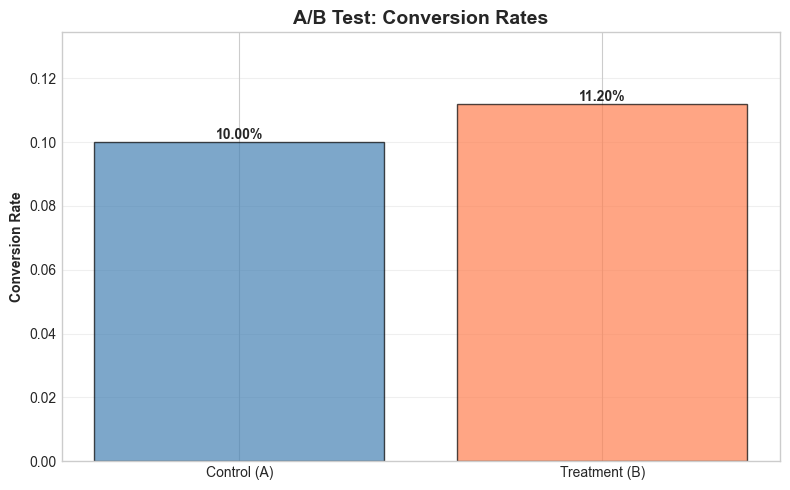

In [20]:
from statsmodels.stats.proportion import proportions_ztest

# Simulate A/B test scenario
np.random.seed(42)
n_users = 1000

# Control group (A): 10% conversion rate
control_conversions = np.random.binomial(1, 0.10, n_users)
control_rate = control_conversions.mean()

# Treatment group (B): 12% conversion rate
treatment_conversions = np.random.binomial(1, 0.12, n_users)
treatment_rate = treatment_conversions.mean()

# Perform two-proportion z-test
z_stat, p_value = proportions_ztest(
    [control_conversions.sum(), treatment_conversions.sum()],
    [n_users, n_users]
)

print("A/B Test Results:")
print("=" * 60)
print(f"Sample size per group: {n_users}")
print(f"\nControl (A):")
print(f"  Conversions: {control_conversions.sum()}")
print(f"  Conversion rate: {control_rate:.2%}")
print(f"\nTreatment (B):")
print(f"  Conversions: {treatment_conversions.sum()}")
print(f"  Conversion rate: {treatment_rate:.2%}")
print(f"\nLift: {((treatment_rate - control_rate) / control_rate * 100):.2f}%")
print(f"\nZ-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"\nDecision (alpha=0.05):")
if p_value < 0.05:
    print("  Reject H0. Conversion rates differ significantly.")
    print(f"  Treatment performs better (statistical significance).")
else:
    print("  Fail to reject H0. No significant difference detected.")

# Visualize
fig, ax = plt.subplots(figsize=(8, 5))
groups = ['Control (A)', 'Treatment (B)']
rates = [control_rate, treatment_rate]
colors = ['steelblue', 'coral']
bars = ax.bar(groups, rates, color=colors, edgecolor='black', alpha=0.7)
ax.set_ylabel('Conversion Rate', fontweight='bold')
ax.set_title('A/B Test: Conversion Rates', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(rates) * 1.2)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2%}', ha='center', va='bottom', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<a id='regression'></a>
## 10. Linear Regression Analysis

Linear regression models the relationship between dependent and independent variables.

Linear Regression Results:
Dependent variable: purchase_amount
Independent variable: age

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5883
Date:                Sun, 05 Oct 2025   Prob (F-statistic):              0.445
Time:                        18:11:20   Log-Likelihood:                -699.72
No. Observations:                 100   AIC:                             1403.
Df Residuals:                      98   BIC:                             1409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

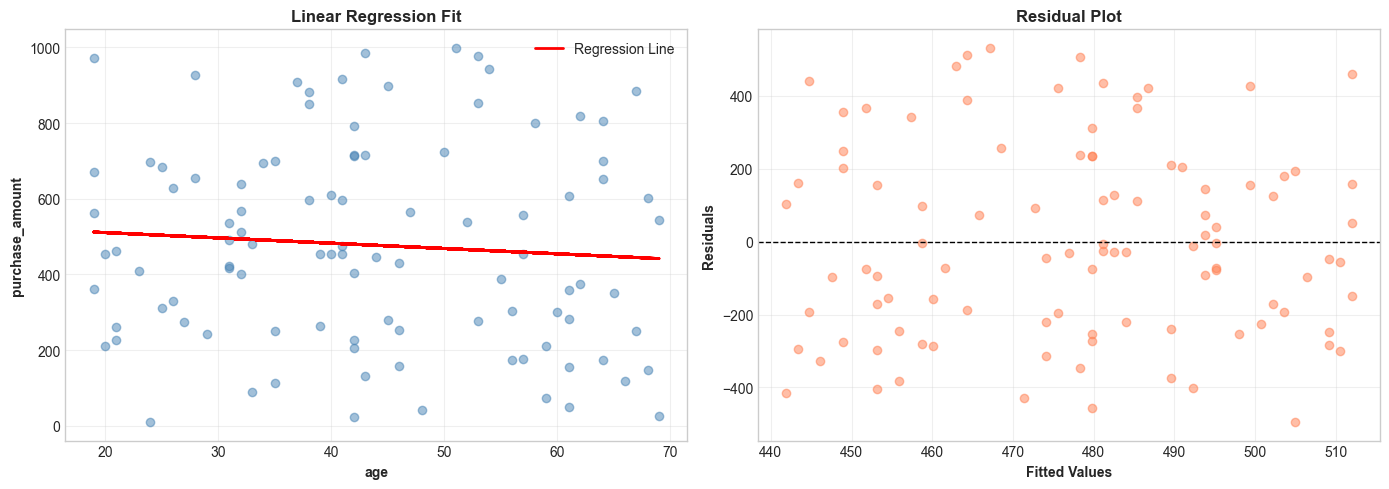


Key Metrics:
  R-squared: 0.0060
  Adj. R-squared: -0.0042
  F-statistic p-value: 0.4449


In [21]:
# Simple linear regression
if len(numeric_cols) >= 2:
    X = df[numeric_cols[0]].values.reshape(-1, 1)
    y = df[numeric_cols[1]].values
    
    # Add constant for intercept
    X_with_const = sm.add_constant(X)
    
    # Fit model
    model = sm.OLS(y, X_with_const).fit()
    
    print("Linear Regression Results:")
    print("=" * 60)
    print(f"Dependent variable: {numeric_cols[1]}")
    print(f"Independent variable: {numeric_cols[0]}")
    print(f"\n{model.summary()}")
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Scatter plot with regression line
    axes[0].scatter(X, y, alpha=0.5, color='steelblue')
    axes[0].plot(X, model.predict(X_with_const), color='red', linewidth=2, label='Regression Line')
    axes[0].set_xlabel(numeric_cols[0], fontweight='bold')
    axes[0].set_ylabel(numeric_cols[1], fontweight='bold')
    axes[0].set_title('Linear Regression Fit', fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Residual plot
    residuals = model.resid
    axes[1].scatter(model.fittedvalues, residuals, alpha=0.5, color='coral')
    axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
    axes[1].set_xlabel('Fitted Values', fontweight='bold')
    axes[1].set_ylabel('Residuals', fontweight='bold')
    axes[1].set_title('Residual Plot', fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nKey Metrics:")
    print(f"  R-squared: {model.rsquared:.4f}")
    print(f"  Adj. R-squared: {model.rsquared_adj:.4f}")
    print(f"  F-statistic p-value: {model.f_pvalue:.4f}")

<a id='summary'></a>
## 11. Summary

### Statistical Analyses Completed

1. **Descriptive Statistics:** Mean, median, mode, variance, skewness, kurtosis
2. **Distributions:** Normality testing, Q-Q plots, binomial, Poisson, t-distributions
3. **Correlation:** Pearson, Spearman, Kendall methods with significance testing
4. **Hypothesis Tests:** One-sample t-test, two-sample t-test, chi-square test
5. **ANOVA:** One-way ANOVA with post-hoc Tukey HSD
6. **Confidence Intervals:** 95% CI for population means
7. **A/B Testing:** Two-proportion z-test for conversion rates
8. **Regression:** Simple linear regression with diagnostics

### Key Statistical Concepts

- Null hypothesis (H0) represents no effect or no difference
- P-value < 0.05 indicates statistical significance at 95% confidence
- Correlation does not imply causation
- Check assumptions before applying parametric tests
- Effect size matters as much as statistical significance

### Next Steps

These statistical insights prepare for:
- Data visualization (Module 4)
- Comprehensive EDA (Module 5)
- Advanced modeling decisions